In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
def merge(fea_csv, label_csv):
    columns = fea_csv.columns.tolist()
    columns.extend(label_csv.columns.tolist())
    values_list = []
    pids = label_csv['PID'].values.tolist()
    pids = [str(pid).split('.')[0] for pid in pids]
    for i in range(len(fea_csv)):
        row = fea_csv.iloc[i]
        path = row['path']
        num = str(path.split('/')[-1].split('_')[0])
        info = row.values.tolist()
        for m in range(len(pids)):
            pid = pids[m]
            if pid == num:
                info.extend(label_csv.iloc[m].values.tolist())
                values_list.append(info)
                break
    df = pd.DataFrame(values_list, columns=columns)
    #print(df.head())
    print(df['path'].values.tolist()[:10])
    print(df['Time'].values.tolist()[:10])
    return df

def gen_dataset_labels(all_file, split):
    #csv_file = all_file[all_file['Split'] == split]
    csv_file = all_file
    columns_list = csv_file.columns.tolist()
    columns = columns_list[1:-4]
    dataset = csv_file[columns]
    labels = csv_file[columns_list[-3]]
    labels = (labels > 10) * 1
    #labels = (labels < 10) * 1
    #print(np.sum(labels), len(labels))
    return dataset, labels


stanford_csv = pd.read_csv('stanford_features_final.csv')
stanford_csv_label = pd.read_csv('preprocessed_stanford.csv')

MD_csv = pd.read_csv('MD_features_final.csv')
MD_csv_label = pd.read_csv('preprocessed_MD.csv')

stanford_labelVfea = merge(stanford_csv, stanford_csv_label)
MD_labelVfea = merge(MD_csv, MD_csv_label)

stanford_labelVfea.to_csv('all_stanford.csv')
MD_labelVfea.to_csv('all_MD.csv')


train_dataset, train_labels = gen_dataset_labels(stanford_labelVfea, 'train')
val_dataset, val_labels = gen_dataset_labels(stanford_labelVfea, 'val')
test_dataset, test_labels = gen_dataset_labels(stanford_labelVfea, 'test')
columns = train_dataset.columns
ss = StandardScaler()
ss.fit(train_dataset)
print(ss.mean_.shape)
train_dataset = pd.DataFrame(ss.transform(train_dataset))
val_dataset = ss.transform(val_dataset)
test_dataset = ss.transform(test_dataset)
print(np.amax(train_dataset))
print(np.amax(val_dataset))
print(np.amax(test_dataset))

parameters = {'alpha':[0.0001, 0.0009, 0.001, 0.002, 0.003, 0.01, 0.1, 1, 10, 100]}
lasso = Lasso(max_iter=30000)
lasso_cv = GridSearchCV(lasso, parameters, cv=5)
lasso_cv.fit(train_dataset, train_labels)
print('最佳参数', lasso_cv.best_params_)
lasso_mod = Lasso(alpha=lasso_cv.best_params_['alpha'], max_iter=30000)
lasso_mod.fit(train_dataset, train_labels)

y_train_pred = lasso_mod.predict(train_dataset)

RMSE = np.sqrt(mean_squared_error(train_labels,y_train_pred))
r2 = r2_score(train_labels, y_train_pred)



In [ ]:
from sklearn import metrics
def prediction(lasso, test_dataset, test_labels):
    # lasso_predict = lasso.predict(test_dataset)
    lasso_predict = (lasso.predict(test_dataset) > 0.5) * 1
    print(sum(lasso_predict==test_labels))
    print(metrics.classification_report(test_labels,lasso_predict))
    print(metrics.confusion_matrix(test_labels, lasso_predict))
    RMSE = np.sqrt(mean_squared_error(test_labels,lasso_predict))
    print(RMSE)
    return RMSE

prediction(lasso_mod, train_dataset, train_labels)

print(lasso_cv.best_params_['alpha'])
print(RMSE, r2)
print(y_train_pred)

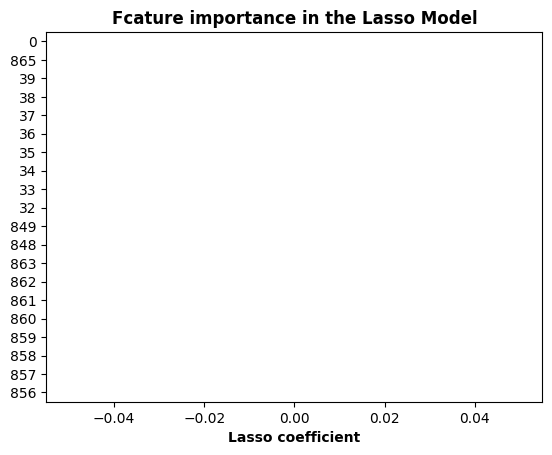

Lasso 保留了 0 个重要特征，弃了 866 个非重要特征


In [8]:
import matplotlib.pyplot as plt
coefs=pd.Series(lasso_mod.coef_, index=train_dataset.columns)
imp_coefs=pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])
imp_coefs.plot(kind='barh',color='yellowgreen')
plt.xlabel('Lasso coefficient',weight='bold')
plt.title("Fcature importance in the Lasso Model",weight='bold')
plt.show()
print("Lasso 保留了",sum(coefs!=0),"个重要特征，弃了", sum(coefs==0),"个非重要特征")

In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
def prediction(lasso, test_dataset, test_labels):
    # lasso_predict = lasso.predict(test_dataset)
    lasso_predict = (lasso.predict(test_dataset) > 0.5) * 1
    print(sum(lasso_predict==test_labels))
    print(metrics.classification_report(test_labels,lasso_predict))
    print(metrics.confusion_matrix(test_labels, lasso_predict))
    RMSE = np.sqrt(mean_squared_error(test_labels,lasso_predict))
    print(RMSE)
    return RMSE

def merge(fea_csv, label_csv):
    columns = fea_csv.columns.tolist()
    columns.extend(label_csv.columns.tolist())
    values_list = []
    pids = label_csv['PID'].values.tolist()
    pids = [str(pid).split('.')[0] for pid in pids]
    for i in range(len(fea_csv)):
        row = fea_csv.iloc[i]
        path = row['path']
        num = str(path.split('/')[-1].split('_')[0])
        info = row.values.tolist()
        for m in range(len(pids)):
            pid = pids[m]
            if pid == num:
                info.extend(label_csv.iloc[m].values.tolist())
                values_list.append(info)
                break
    df = pd.DataFrame(values_list, columns=columns)
    #print(df.head())
    print(df['path'].values.tolist()[:10])
    print(df['Time'].values.tolist()[:10])
    return df

def gen_dataset_labels(all_file, split):
    csv_file = all_file[all_file['Split'] == split]
    csv_file = csv_file
    columns_list = csv_file.columns.tolist()
    columns = columns_list[1:-4]
    dataset = csv_file[columns]
    labels = csv_file[columns_list[-3]]
    labels = (labels < 15) * 1
    #labels = (labels < 10) * 1
    #print(np.sum(labels), len(labels))
    return dataset, labels


stanford_csv = pd.read_csv('stanford_features_final.csv')
stanford_csv_label = pd.read_csv('preprocessed_stanford.csv')

MD_csv = pd.read_csv('MD_features_final.csv')
MD_csv_label = pd.read_csv('preprocessed_MD.csv')

stanford_labelVfea = merge(stanford_csv, stanford_csv_label)
MD_labelVfea = merge(MD_csv, MD_csv_label)

stanford_labelVfea.to_csv('all_stanford.csv')
MD_labelVfea.to_csv('all_MD.csv')


train_dataset, train_labels = gen_dataset_labels(stanford_labelVfea, 'train')
val_dataset, val_labels = gen_dataset_labels(stanford_labelVfea, 'val')
test_dataset, test_labels = gen_dataset_labels(stanford_labelVfea, 'test')
columns = train_dataset.columns
ss = StandardScaler()
ss.fit(train_dataset)
print(ss.mean_.shape)
train_dataset = pd.DataFrame(ss.transform(train_dataset))
val_dataset = ss.transform(val_dataset)
test_dataset = ss.transform(test_dataset)
print(np.amax(train_dataset))
print(np.amax(val_dataset))
print(np.amax(test_dataset))

for alpha in [0.0001, 0.0009, 0.001, 0.002, 0.003, 0.01, 0.1, 1, 10, 100]:
    lasso_mod = Lasso(alpha=alpha, max_iter=30000)
    lasso_mod.fit(train_dataset, train_labels)
    prediction(lasso_mod, train_dataset, train_labels)
    y_train_pred = lasso_mod.predict(train_dataset)
    RMSE = np.sqrt(mean_squared_error(train_labels,y_train_pred))
    r2 = r2_score(train_labels, y_train_pred)

    prediction(lasso_mod, val_dataset, val_labels)
    y_val_pred = lasso_mod.predict(val_dataset)
    RMSE = np.sqrt(mean_squared_error(val_labels,y_val_pred))
    r2 = r2_score(val_labels, y_val_pred)

    prediction(lasso_mod, test_dataset, test_labels)
    y_test_pred = lasso_mod.predict(test_dataset)
    RMSE = np.sqrt(mean_squared_error(test_labels,y_test_pred))
    r2 = r2_score(test_labels, y_test_pred)


['/storage1/jiaorushi/20240116Rushi/Stanford/preprocessed/1_image.nii.gz', '/storage1/jiaorushi/20240116Rushi/Stanford/preprocessed/2_image.nii.gz', '/storage1/jiaorushi/20240116Rushi/Stanford/preprocessed/3_image.nii.gz', '/storage1/jiaorushi/20240116Rushi/Stanford/preprocessed/4_image.nii.gz', '/storage1/jiaorushi/20240116Rushi/Stanford/preprocessed/5_image.nii.gz', '/storage1/jiaorushi/20240116Rushi/Stanford/preprocessed/6_image.nii.gz', '/storage1/jiaorushi/20240116Rushi/Stanford/preprocessed/7_image.nii.gz', '/storage1/jiaorushi/20240116Rushi/Stanford/preprocessed/8_image.nii.gz', '/storage1/jiaorushi/20240116Rushi/Stanford/preprocessed/9_image.nii.gz', '/storage1/jiaorushi/20240116Rushi/Stanford/preprocessed/10_image.nii.gz']
[7.233333333, 10.93333333, 17.66666667, 15.83333333, 12.73026316, 30.03289474, 76.76666667, 3.266666667, 3.4, 11.23333333]
['/storage1/jiaorushi/20240116Rushi/MD/preprocessed/LUP409_image.nii.gz', '/storage1/jiaorushi/20240116Rushi/MD/preprocessed/LUP411_ima

/home/sjtu/anaconda3/envs/pytorch_jrs/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sjtu/anaconda3/envs/pytorch_jrs/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sjtu/anaconda3/envs/pytorch_jrs/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

866
Lasso 保留了 92 个重要特征，弃了 774 个非重要特征


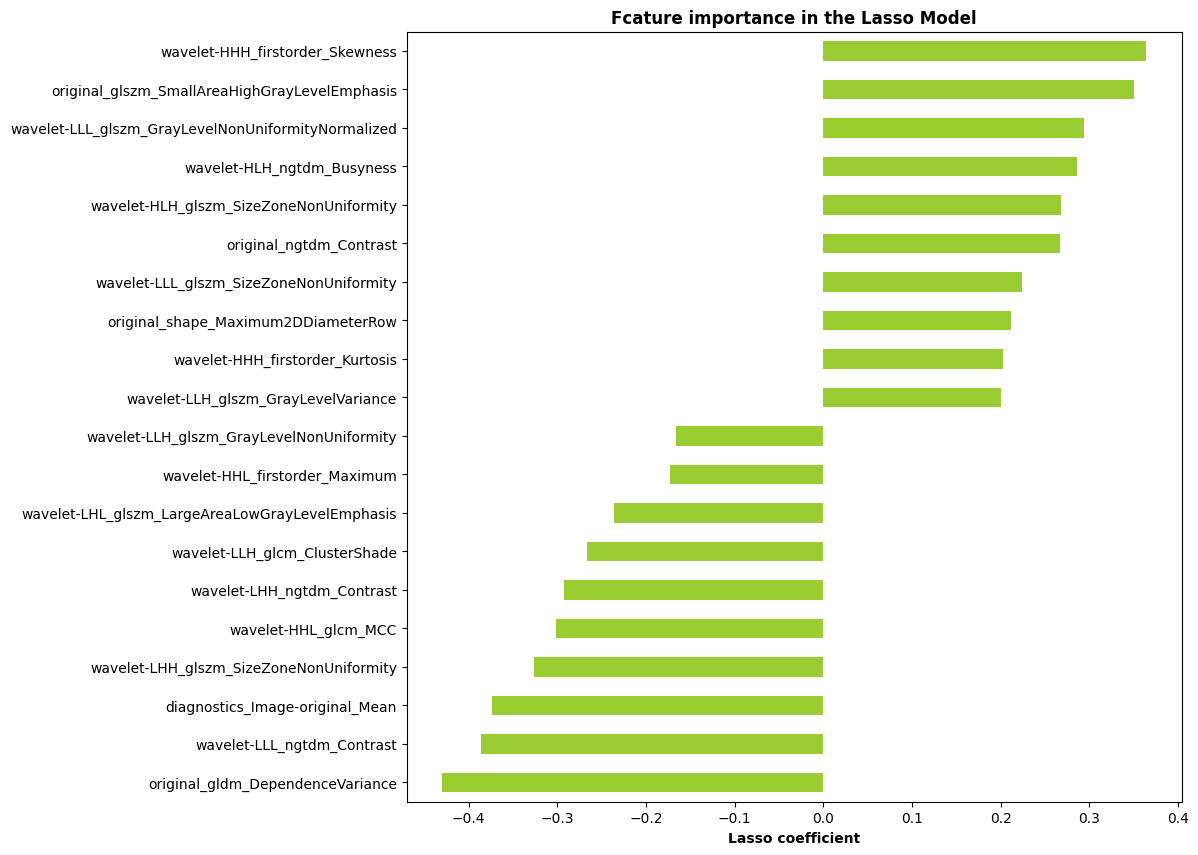

In [20]:

import matplotlib.pyplot as plt
lasso_mod = Lasso(alpha=0.0001, max_iter=30000)
lasso_mod.fit(train_dataset, train_labels)
print(len(columns))
coefs=pd.Series(lasso_mod.coef_, index=columns)
imp_coefs=pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])
imp_coefs.to_csv('important_coef.csv')
plt.figure(figsize=(10,10))
imp_coefs.plot(kind='barh',color='yellowgreen')
plt.xlabel('Lasso coefficient',weight='bold')
plt.title("Fcature importance in the Lasso Model",weight='bold')
plt.savefig('coef.png', dpi=800, bbox_inches='tight')
print("Lasso 保留了",sum(coefs!=0),"个重要特征，弃了", sum(coefs==0),"个非重要特征")